In [44]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path)

import pandas as pd
import numpy as np
import math

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

#force reimport
if 'pygents.aigents_api' in sys.modules:
    del sys.modules['pygents.aigents_api']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']

from pygents.aigents_api import tokenize_re, punct, TextMetrics, load_ngrams, build_ngrams
from pygents.plot import plot_dict
from pygents.util import dictcount, dict_compress_with_loss, dictdict_div_dict, dictdict_mul_dictdict

def language_metrics(lang,metrics_list,path):
    metrics = {}
    for m in metrics_list:
        metrics[m] = path + lang + '/' + m + '.txt'
    return metrics

In [8]:
lm = language_metrics('',['All-or-nothing_thinking','Fortune-telling','Mental_filter','Overgeneralization','Distortion',
                                                'Labeling','Mind_Reading','Personalization','Emotional_Reasoning','Magnification',
                                                'Should_statements'],
                                            path='./data/models/distortions/split_combined/multiclass_view_cleaned/joint/')
lm

{'All-or-nothing_thinking': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//All-or-nothing_thinking.txt',
 'Fortune-telling': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Fortune-telling.txt',
 'Mental_filter': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Mental_filter.txt',
 'Overgeneralization': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Overgeneralization.txt',
 'Distortion': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Distortion.txt',
 'Labeling': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Labeling.txt',
 'Mind_Reading': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Mind_Reading.txt',
 'Personalization': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Personalization.txt',
 'Emotional_Reasoning': './data/models/distortions/split_combined/multiclass_view_cleaned/jo

In [12]:
tm = TextMetrics(lm,encoding="utf-8",metric_logarithmic=True,debug=False)
tm.metrics

{'All-or-nothing_thinking': {('a', 'decision'),
  ('a', 'decision', 'and'),
  ('a', 'decision', 'and', 'that'),
  ('a', 'given'),
  ('a', 'given', 'issue'),
  ('a', 'given', 'issue', 'way'),
  ('a', 'week', 'ago', 'and'),
  ('about', 'a', 'given'),
  ('about', 'a', 'given', 'issue'),
  ('about', 'it', 'and', 'everything'),
  ('ago', 'and', 'now'),
  ('ago', 'and', 'now', 'i'),
  ('all', 'solved'),
  ('all', 'solved', 'and'),
  ('all', 'solved', 'and', 'i'),
  ('am', 'free'),
  ('am', 'free', 'or'),
  ('am', 'free', 'or', 'happy'),
  ('and', 'everything', 'i'),
  ('and', 'everything', 'i', 'just'),
  ('and', 'i', 'do', 'that'),
  ('and', 'i', 'know', 'it'),
  ('and', 'it’s', 'as'),
  ('and', 'it’s', 'as', 'if'),
  ('and', 'now', 'i', 'have'),
  ('and', 'that', 'problem'),
  ('and', 'that', 'problem', 'is'),
  ('because', 'im'),
  ('but', 'i', 'haven’t'),
  ('but', 'when', 'i', 'got'),
  ('can’t', 'focus'),
  ('can’t', 'focus', 'on'),
  ('can’t', 'stop', 'it'),
  ('can’t', 'stop', 'it', 

In [39]:
#left->right
l = list(tm.metrics['Distortion'])
#l = list(tm.metrics['Mental_filter'])
l.sort()
l

[('-30',),
 ('-30', 'partners'),
 ('-i',),
 ('-i', 'always'),
 ('-i', 'always', 'end'),
 ('-i', 'always', 'end', 'up'),
 ('-not',),
 ('-not', 'people'),
 ('-not', 'people', 'but'),
 ('-not', 'people', 'but', 'things-'),
 ('/less',),
 ('/less', 'aware'),
 ('/less', 'aware', 'knowledge'),
 ('1-2',),
 ('1-2', 'times'),
 ('1-2', 'times', 'a'),
 ('1-2', 'times', 'a', 'month'),
 ('1/2',),
 ('1/2', 'years'),
 ('1/2', 'years', 'i'),
 ('1/2', 'years', 'i', 'have'),
 ('1/2', 'years', 'later'),
 ('1/2', 'years', 'later', 'i'),
 ('12th',),
 ('12th', 'results'),
 ('12th', 'results', 'yesterday'),
 ('12th', 'results', 'yesterday', 'and'),
 ('2/3',),
 ('2/3', 'days'),
 ('2/3', 'days', 'that'),
 ('2/3', 'days', 'that', 'city'),
 ('20s',),
 ('24/7', 'and'),
 ('24/7', 'and', 'feel'),
 ('24/7', 'and', 'feel', 'an'),
 ('24/7', 'but'),
 ('24/7', 'but', 'things'),
 ('24/7', 'but', 'things', 'have'),
 ('24/7now',),
 ('24/7now', 'ive'),
 ('24/7now', 'ive', 'started'),
 ('24/7now', 'ive', 'started', 'having'),

In [40]:
#right->left
r = [tuple(reversed(x)) for x in l]
r.sort()
r

[('-30',),
 ('-30', 'about'),
 ('-30', 'about', 'with'),
 ('-30', 'about', 'with', 'experiences'),
 ('-i',),
 ('-i', 'me'),
 ('-i', 'me', 'leave'),
 ('-i', 'me', 'leave', 'they’ll'),
 ('-not',),
 ('-not', 'him'),
 ('-not', 'him', 'of'),
 ('-not', 'him', 'of', 'front'),
 ('/less',),
 ('/less', 'petty'),
 ('/less', 'petty', 'or'),
 ('/less', 'petty', 'or', 'grammar'),
 ('1-2',),
 ('1-2', 'sex'),
 ('1-2', 'sex', 'have'),
 ('1-2', 'sex', 'have', 'we'),
 ('1/2',),
 ('1/2', 'and'),
 ('1/2', 'and', 'now'),
 ('1/2', 'and', 'now', 'worried'),
 ('1/2', 'for'),
 ('1/2', 'for', 'retired'),
 ('1/2', 'for', 'retired', 'been'),
 ('1/2', 'past'),
 ('1/2', 'past', 'the'),
 ('1/2', 'past', 'the', 'for'),
 ('12th',),
 ('12th', 'my'),
 ('12th', 'my', 'got'),
 ('12th', 'my', 'got', 'i'),
 ('2/3',),
 ('2/3', 'for'),
 ('2/3', 'for', 'there'),
 ('2/3', 'for', 'there', 'staying'),
 ('20s',),
 ('20s', 'my'),
 ('24/7', 'been'),
 ('24/7', 'been', 'it’s'),
 ('24/7', 'been', 'it’s', 'months'),
 ('24/7', 'him'),
 ('

In [42]:
#TODO count for compression
sum()
N_max = max([len(x) for x in l]) - 1
N_max

3

In [182]:
def tuple_find(self,pattern):
    pat_len = len(pattern)
    if pattern[0] in self:
        index = self.index(pattern[0])
        if len(pattern) == 1:
            return index
        if (len(self) - index) >= pat_len:
            if pattern == self[index:index + pat_len]:
                return index
    return -1

assert(tuple_find((1,2),(1,))==0)
assert(tuple_find((1,2),(2,))==1)
assert(tuple_find((1,2),(1,2))==0)
assert(tuple_find((1,2),(3,))==-1)
assert(tuple_find((1,2,3),(1,2))==0)
assert(tuple_find((1,2,3),(2,3))==1)
assert(tuple_find((1,2,3),(2,3,4))==-1)

def tuple_fix(self,pattern,index):
    pat_len = len(pattern)
    if self == pattern:
        return self
    if index == 0:
        return (pattern,) + self[pat_len:]
    if (len(self) - index) == pat_len:
        return self[:index] + (pattern,)
    return self[:index] + (pattern,) + self[index + pat_len:]
        
        
assert(tuple_fix((1,2,3,4),(1,2),0)==((1,2),3,4))
assert(tuple_fix((1,2,3,4),(3,4),2)==(1,2,(3,4)))
assert(tuple_fix((1,2,3,4),(2,3),1)==(1,(2,3),4))


def setcount(s,i):
    if not i in s:
        s.add(i)
                    
def hpattern_size(hpattern,counter=setcount,dictionary=None):
    """ evaluate size of hierarchical tuple/set/dict/list-based pattern, return overall number of positions plus dictionary"""
    if dictionary is None:
        dictionary = set() if counter == setcount else {} # counter == dictcount
    positions_cnt = 0
    for hitem in hpattern:
        positions_cnt += 1
        if not hitem in dictionary:
            if type(hitem) in (tuple,list,set,dict):
                positions_cnt += hpattern_size(hitem,counter,dictionary)[1]
        counter(dictionary,hitem)
    size = positions_cnt + len(dictionary)
    return size, positions_cnt, dictionary

print(hpattern_size((1,2,2))==(5, 3, {1, 2}))
print(hpattern_size((1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2))==(18, 16, {1, 2})) # non-normalized input
print(hpattern_size(((1,2,1,2,1,2,1,2),(1,2,1,2,1,2,1,2)))==(13, 10, {1, 2, (1, 2, 1, 2, 1, 2, 1, 2)})) # well-normalized model
print(hpattern_size(((1,2,1,2),(1,2,1,2),(1,2,1,2),(1,2,1,2)))==(11, 8, {(1, 2, 1, 2), 1, 2})) # best-normalized model
print(hpattern_size(((1,2),(1,2),(1,2),(1,2),(1,2),(1,2),(1,2),(1,2)))==(13, 10, {1, 2, (1, 2)})) # well-normalized model
print(hpattern_size((1,2,3,4,1,2,3,5,1,2,4,6,1,2,4,7))==(23, 16, {1, 2, 3, 4, 5, 6, 7})) # non-normalized input 
print(hpattern_size(((1,2),3,4,(1,2),3,5,(1,2),4,6,(1,2),4,7))==(22, 14, {1, 2, 3, (1, 2), 4, 5, 6, 7})) # well-normalized model
print(hpattern_size(((1,2,3),4,(1,2,3),5,(1,2,4),6,(1,2,4),7))==(23, 14, {1, 2, 3, 4, 5, 6, 7, (1, 2, 3), (1, 2, 4)})) # alt-normalized model
print(hpattern_size((((1,2),3),4,((1,2),3),5,((1,2),4),6,((1,2),4),7))==(24, 14, {1, 2, 3, (1, 2), 4, 5, 6, 7, ((1, 2), 3), ((1, 2), 4)})) # over-normalized model
    

True
True
True
True
True
True
True
True
True


In [168]:
#count frequencies
ng_cnt = {}
for g in l:
    ngs = build_ngrams(g,N_max)
    for ng in ngs:
        dictcount(ng_cnt,ng)
#found the top 
top_cnt = 0
top_ngs = set()
for ng in ng_cnt:
    cnt = ng_cnt[ng]
    if cnt > top_cnt:
        top_ngs.clear()
        top_ngs.add(ng)
        top_cnt = cnt
    elif cnt == top_cnt:
        top_ngs.add(ng)
print(top_cnt,top_ngs)
# replace
new_l = []
for ng in l:
    for top_ng in top_ngs:
        index = tuple_find(ng,top_ng)
        if index > 0:
            new_ng = tuple_fix(ng,top_ng,index)
            print(new_ng)
            ng = new_g
    new_l.append(ng)
    
print(hpattern_dict_size(l))
print(hpattern_dict_size(new_l))


74 {('i', 'feel', 'like')}
('also', ('i', 'feel', 'like'))
('am', ('i', 'feel', 'like'))
('and', ('i', 'feel', 'like'))
('anything', ('i', 'feel', 'like'))
('attacks', ('i', 'feel', 'like'))
('bad', ('i', 'feel', 'like'))
('because', ('i', 'feel', 'like'))
('blunt', ('i', 'feel', 'like'))
('cause', ('i', 'feel', 'like'))
('course', ('i', 'feel', 'like'))
('days', ('i', 'feel', 'like'))
('did', ('i', 'feel', 'like'))
('do', ('i', 'feel', 'like'))
('down', ('i', 'feel', 'like'))
('emotions', ('i', 'feel', 'like'))
('everything', ('i', 'feel', 'like'))
('example', ('i', 'feel', 'like'))
('fun', ('i', 'feel', 'like'))
('happiness', ('i', 'feel', 'like'))
('happy', ('i', 'feel', 'like'))
('hard', ('i', 'feel', 'like'))
('health', ('i', 'feel', 'like'))
('her', ('i', 'feel', 'like'))
('him', ('i', 'feel', 'like'))
('however', ('i', 'feel', 'like'))
('improve', ('i', 'feel', 'like'))
('information', ('i', 'feel', 'like'))
('issues', ('i', 'feel', 'like'))
('it', ('i', 'feel', 'like'))
('know'

ValueError: too many values to unpack (expected 2)

In [169]:
ng_cnt

{('-i', 'always', 'end'): 3,
 ('always', 'end', 'up'): 7,
 ('-not', 'people', 'but'): 3,
 ('people', 'but', 'things-'): 3,
 ('/less', 'aware', 'knowledge'): 2,
 ('1-2', 'times', 'a'): 3,
 ('times', 'a', 'month'): 4,
 ('1/2', 'years', 'i'): 3,
 ('years', 'i', 'have'): 2,
 ('1/2', 'years', 'later'): 3,
 ('years', 'later', 'i'): 3,
 ('12th', 'results', 'yesterday'): 3,
 ('results', 'yesterday', 'and'): 3,
 ('2/3', 'days', 'that'): 3,
 ('days', 'that', 'city'): 3,
 ('24/7', 'and', 'feel'): 3,
 ('and', 'feel', 'an'): 3,
 ('24/7', 'but', 'things'): 3,
 ('but', 'things', 'have'): 3,
 ('24/7now', 'ive', 'started'): 3,
 ('ive', 'started', 'having'): 3,
 ('2am', 'and', 'he'): 3,
 ('and', 'he', 'still'): 3,
 ('2years', 'like', 'that'): 3,
 ('like', 'that', 'and'): 3,
 ('3am', 'that', 'night'): 3,
 ('that', 'night', 'he'): 3,
 ('3d', 'visio-spacial', 'i’m'): 3,
 ('visio-spacial', 'i’m', 'very'): 3,
 ('3rd', 'year', 'at'): 3,
 ('year', 'at', 'university'): 3,
 ('4-5', 'years', 'that'): 3,
 ('years'

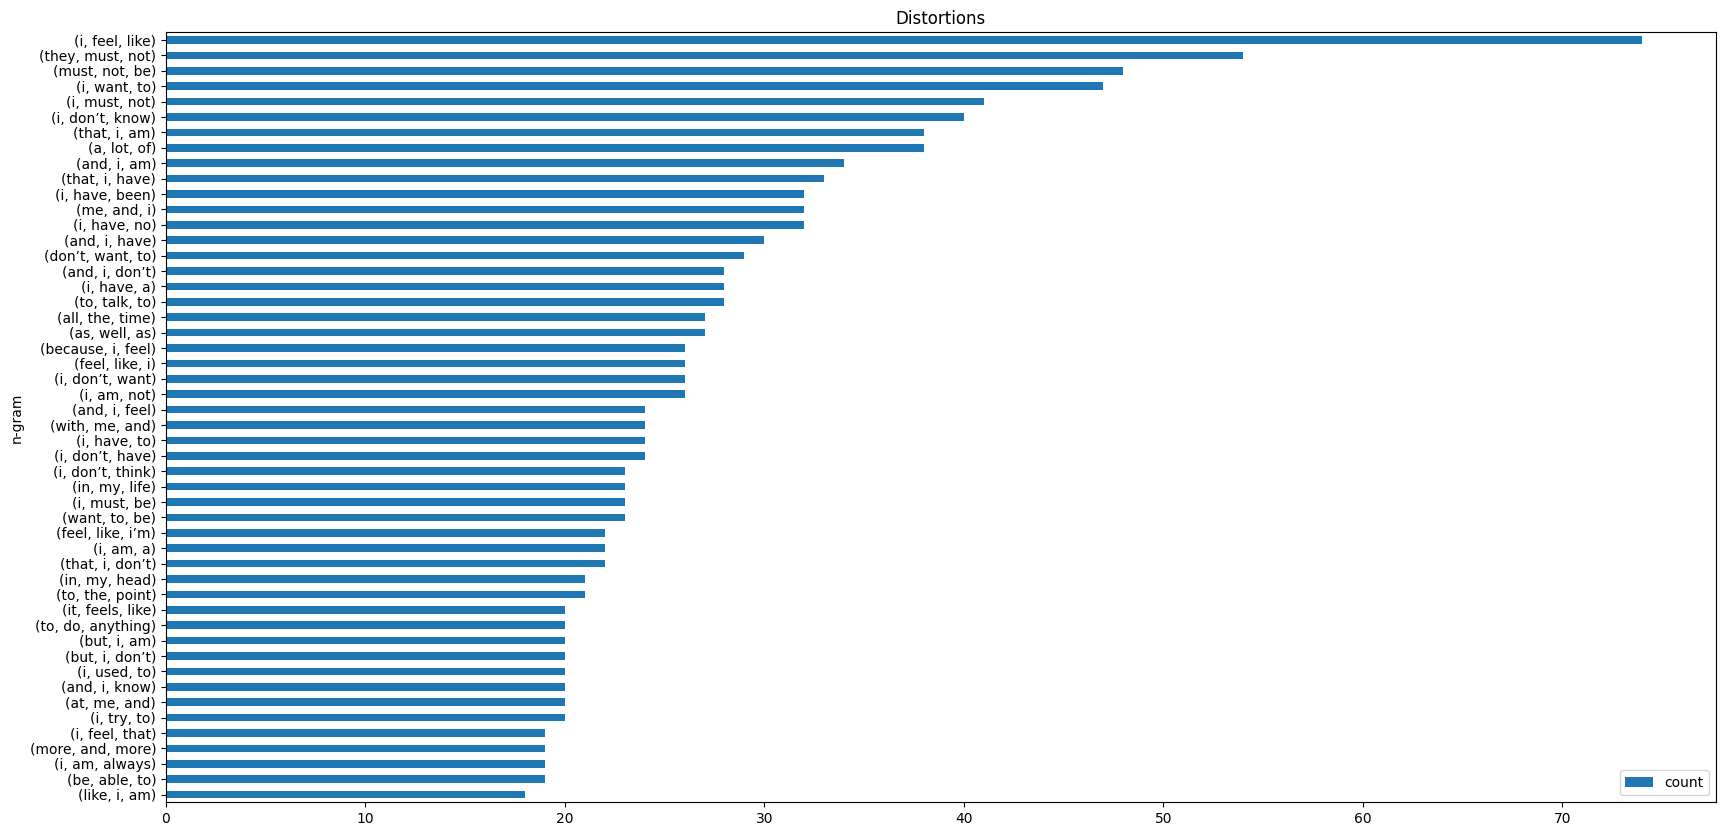

In [136]:
plot_dict(
    ng_cnt,
    labels="n-gram",
    values="count",
    title="Distortions",
    head=50                # Top 20 words
)


In [137]:
# Compute the size of model
# Compute all frequences
# Replace most frequent item everywhere
# Compute the size of model agin, if it is not decresed - stop, if it is decreased go to the beginning and repeat

# Model - compressed data
# Intepretable model - compressed model